In [1]:
'''
Import all the needed packages
'''
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import special as sp
import math


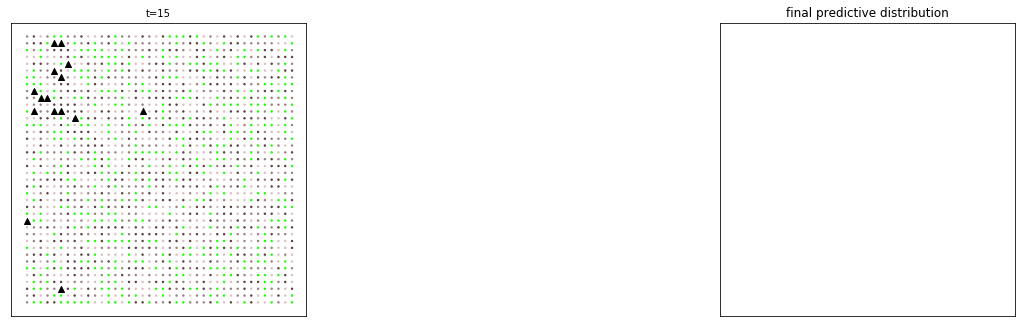

In [29]:
'''
ONLY RUN THIS BLOCK IF YOU WANT TO USE SYNTHETIC DATA

Load synthetic data by function calls in this box
'''
#the data
data = generate_synthetic_data(subdiv=40)

#the dimensions and domains of continuous and discrete
continuous_domain, discrete_domain = get_domains(data)

#the user interaction data
ui_data = generate_synthetic_ui_data(data, 'geo-based')[0]

dims = ['x', 'y', 'type']

#finally, display the data we have so far
visualize(data, ui_data)

In [30]:
ui_data

array([( 0, 0.05128205, 3.76923077, 'd'),
       ( 1, 0.1025641 , 3.87179487, 'c'),
       ( 2, 0.15384615, 3.8974359 , 'b'),
       ( 3, 0.12820513, 3.84615385, 'a'),
       ( 4, 0.12820513, 3.97435897, 'd'),
       ( 5, 0.12820513, 3.71794872, 'c'),
       ( 6, 0.02564103, 3.79487179, 'a'),
       ( 7, 0.02564103, 3.71794872, 'b'),
       ( 8, 0.17948718, 3.69230769, 'a'),
       ( 9, 0.43589744, 3.71794872, 'c'),
       (10, 0.1025641 , 3.71794872, 'a'),
       (11, 0.        , 3.30769231, 'c'),
       (12, 0.1025641 , 3.97435897, 'd'),
       (13, 0.07692308, 3.76923077, 'd'),
       (14, 0.12820513, 3.05128205, 'b')],
      dtype=[('time_stamp', '<i4'), ('x', '<f8'), ('y', '<f8'), ('type', '<U10')])

In [4]:
'''
ONLY RUN THIS BLOCK IF YOU WANT TO USE THE CRIME DATA

Load crime data by function calls in this box
'''
#the data
data = load_crime_data()

#the dimensions and domains of continuous and discrete
continuous_domain, discrete_domain = get_domains(data)

#the user interaction data
ui_data = load_crime_ui_data('task1')[5]

dims = ['lat', 'lng', 'type']


#finally, display the data we have so far
visualize(data, ui_data, x_dim='lat', y_dim='lng', color_dim='type')

NameError: name 'load_crime_data' is not defined

NW model created
Dirichlet model created
model updated; number of observations:  1


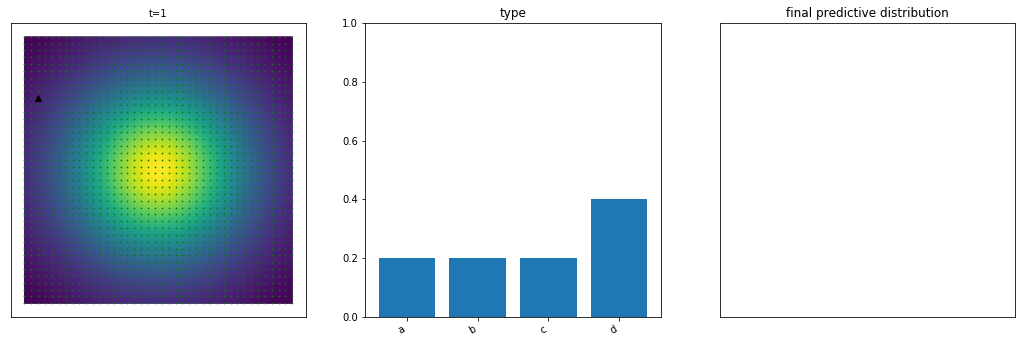

model updated; number of observations:  2


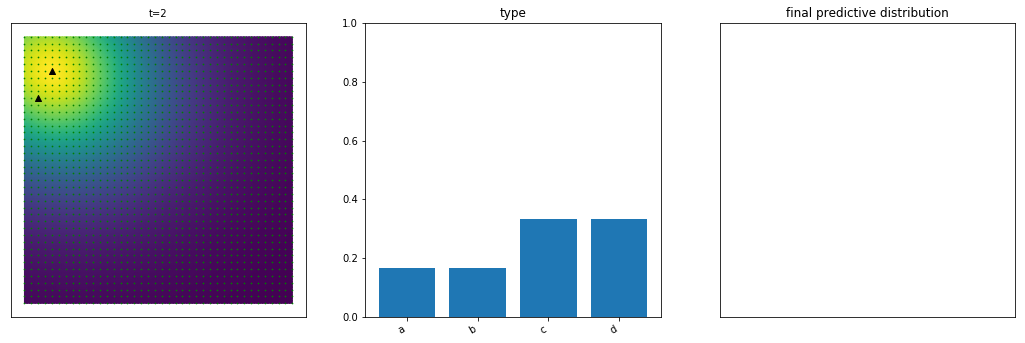

model updated; number of observations:  3


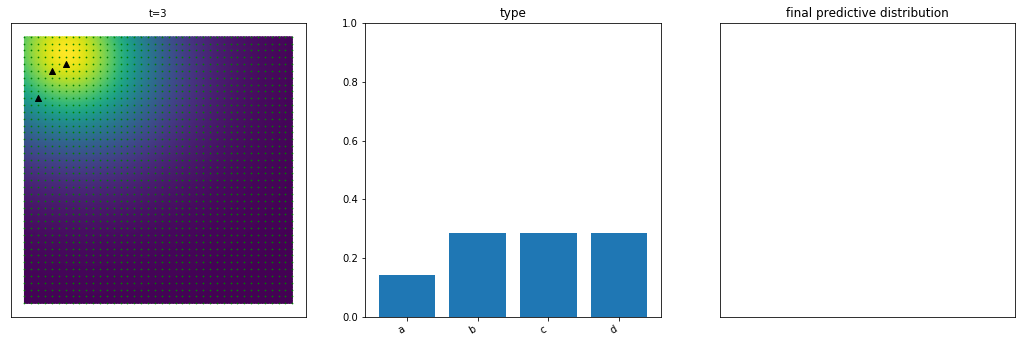

model updated; number of observations:  4


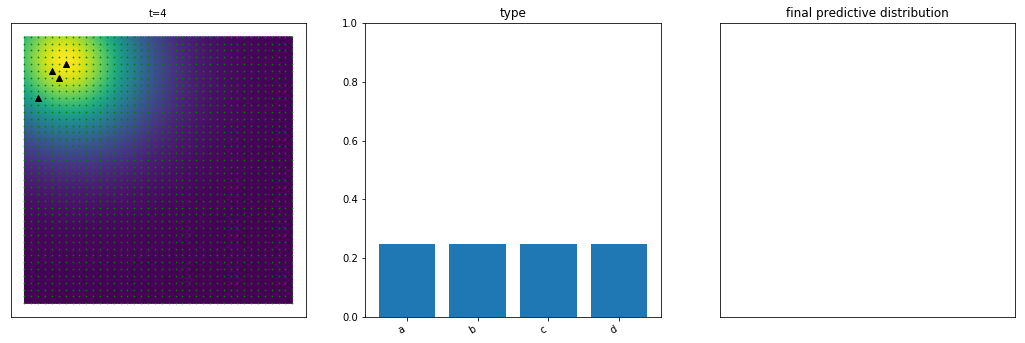

model updated; number of observations:  5


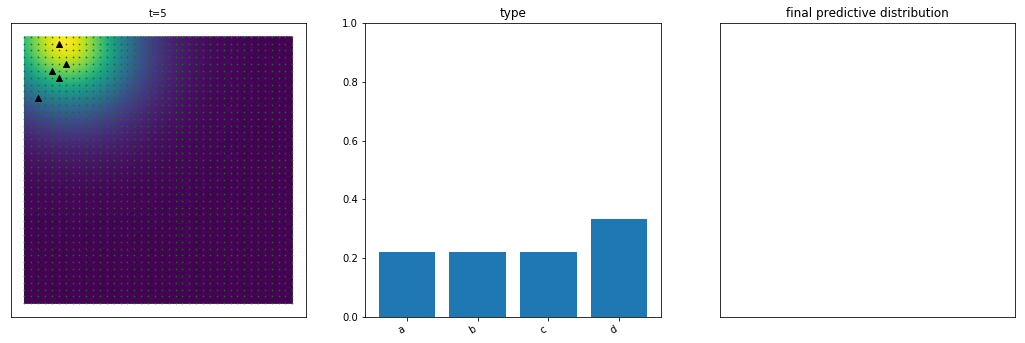

model updated; number of observations:  6


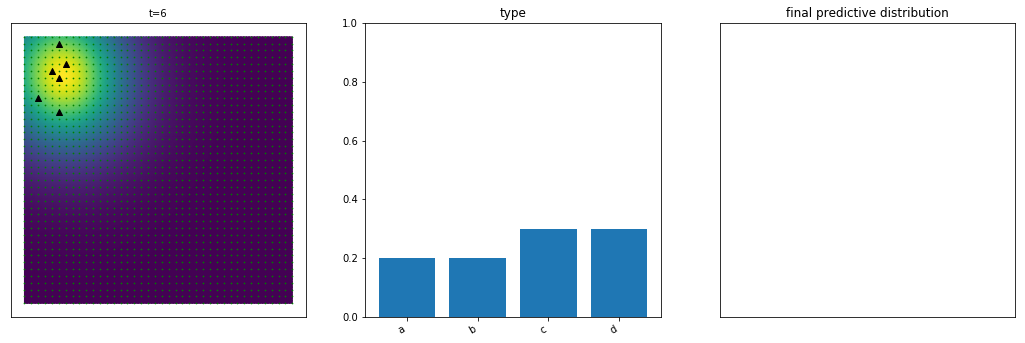

model updated; number of observations:  7


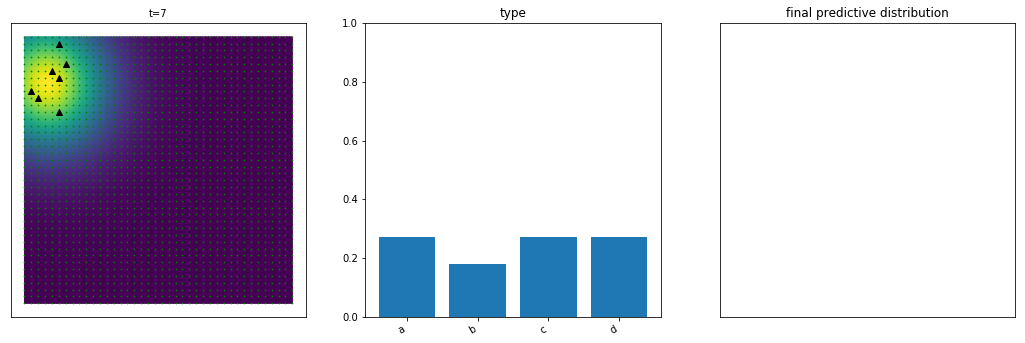

model updated; number of observations:  8


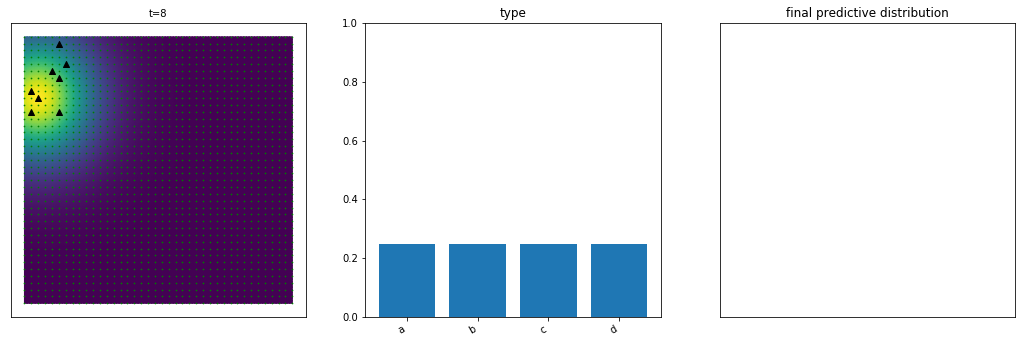

model updated; number of observations:  9


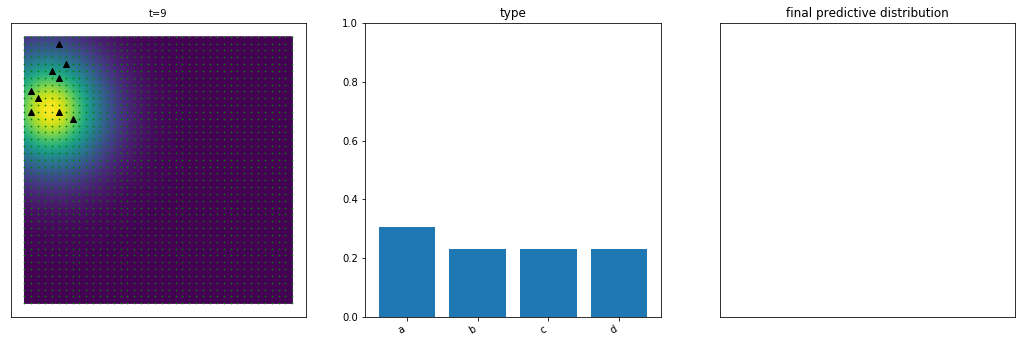

model updated; number of observations:  10


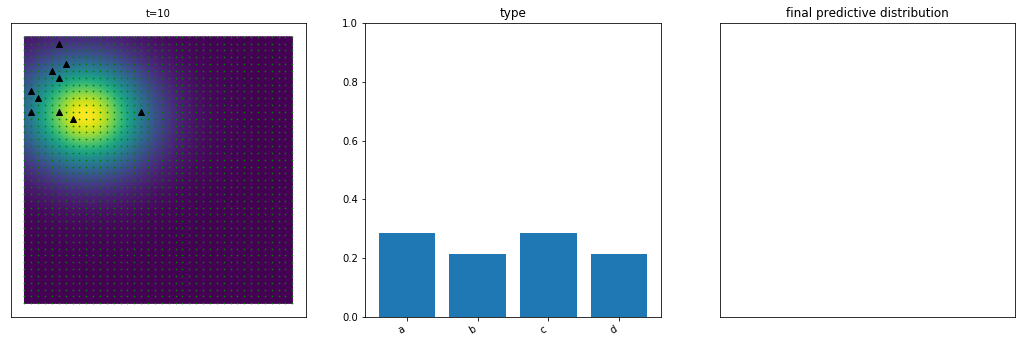

model updated; number of observations:  11


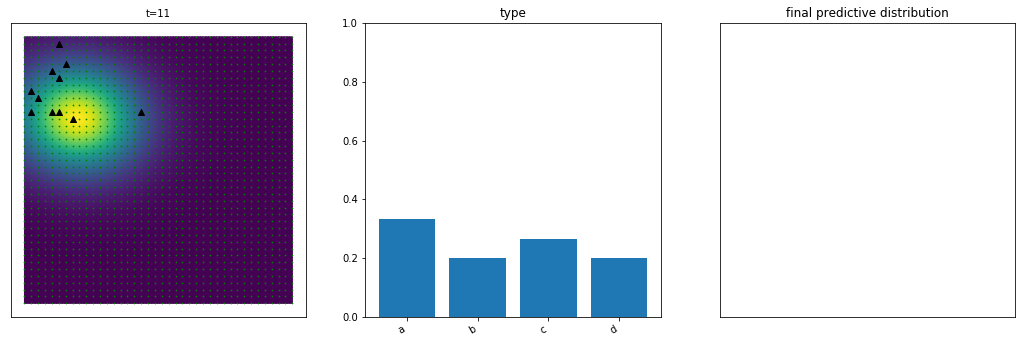

model updated; number of observations:  12


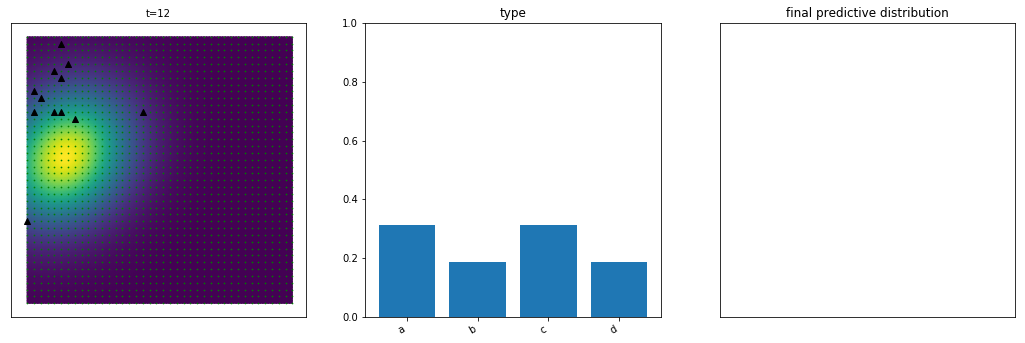

model updated; number of observations:  13


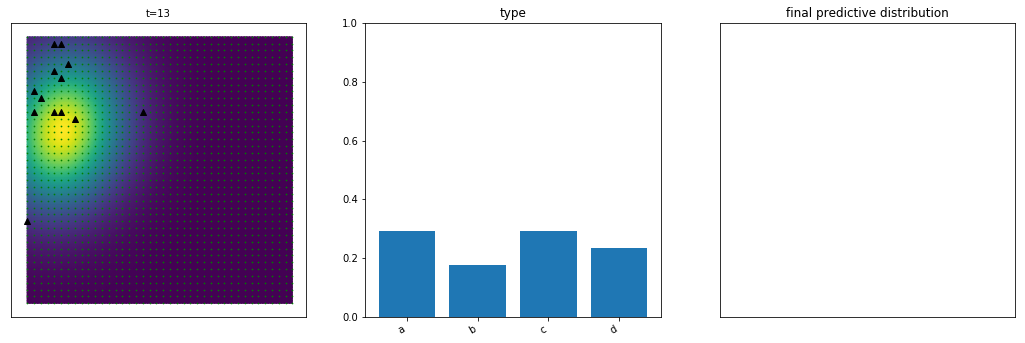

model updated; number of observations:  14


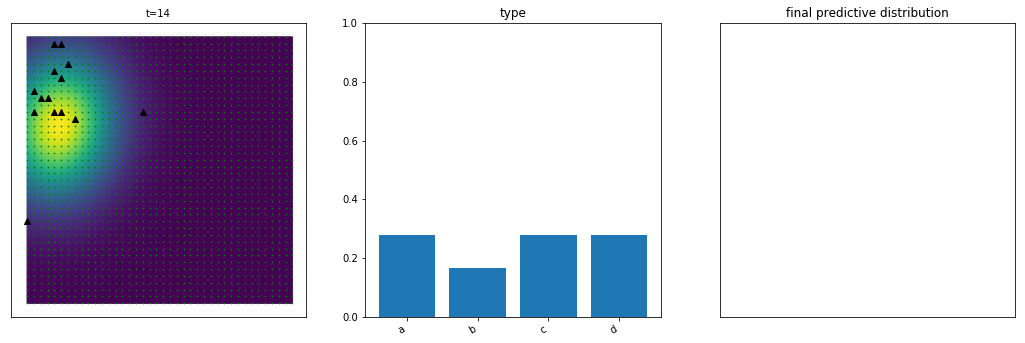

model updated; number of observations:  15


In [ ]:
# model for continuous variables lat and lng
cm = NWModel(data[dims], 0.1,3)

#model for discrete variable type
dm = DirichletModel('type', data['type'], np.ones(len(discrete_domain['type'])))

#add user observations one at a time and graph distributions
for x in ui_data[dims]:
    toadd = {dims[i]: x[i] for i in range(len(dims))}
    cm.update_model(toadd)
    dm.update_model(toadd)
    visualize(data, ui_data, cmodel=cm, dmodel=dm, x_dim=dims[0], y_dim=dims[1], color_dim='type')
    
    
# Retrieve all longitude and latitude coordinates
all_x = np.linspace(continuous_domain['x'][0], continuous_domain['x'][1], 100)
all_y = np.linspace(continuous_domain['x'][0], continuous_domain['y'][1], 100)

# Calculate probability matrix for all (longitude,latitude) coordinates
p = np.array([[cm.get_probability({'x': x, 'y': y}) for x in all_x] for y in all_y])
for i, x in enumerate(all_x):
    for j, y in enumerate(all_y):
        if p[i][j] > .05:
            print(p[i][j])

In [6]:
data

NameError: name 'data' is not defined

In [7]:
'''
Functions to load or generate data
'''

def generate_synthetic_data(subdiv=15):
    '''
    Generate synthetic data in this function;
    We will have two columns of continuous variables, and one column of categorical.
    
    @return a structured numpy array
    '''

    types = ['a', 'b', 'c', 'd']
    xs = np.linspace(0, 1, subdiv)
    ys = np.linspace(3, 4, subdiv)

    '''
    This is the definition of our columns with their names and data types
    '''
    data = np.array([], dtype=[('x', 'float'), ('y', 'float'), ('type', 'U10')])

    '''
    populate the data array
    '''

    for xx in xs:
        for yy in ys:
            element = (xx, yy, random.choice(types))
            data = np.append(data, np.array(element, dtype=data.dtype))
            
    return data


def generate_synthetic_ui_data(data, task_type, number_of_clicks=15):
    """
    based on the task type (geo-based, type-based, mix), we assign a value to cont_propotions
    we generate random interaction data that simulate a certain type of task.
    
    @return an array of structured numpy array
    """
    ui_data = np.array([], dtype=[('time_stamp', 'i4'), ('x', 'float'), ('y', 'float'), ('type', 'U10')])
    
    if task_type == 'geo-based':
        # how likely the data will be geo based
        cont_proportion = 0.9
        
        # data pool from a certain geo area
        data_pool = data[(data['x'] < 0.2) & (data['x'] > 0) & (data['y'] < 4) & (data['y'] > 3.6)]
        
        # populate the user interaction clicks
        for k in range(number_of_clicks):
            if random.random() < cont_proportion:
                # choose a geo based point
                element = np.random.choice(data_pool)
            else:
                # choose a random point from the population
                element = np.random.choice(data)
                
            ui_data = np.append(ui_data, np.array([(k, *element)], dtype = ui_data.dtype))
            
        
    elif task_type == 'type-based':
        # how likely the data will be type based
        disc_proportion = 0.8
        
        # data pool from a certain geo area
        data_pool = data[data['type'] == 'c']
        
        # populate the user interaction clicks
        for k in range(number_of_clicks):
            if random.random() < disc_proportion:
                # choose a type based point
                element = np.random.choice(data_pool)
            else:
                # choose a random point from the population
                element = np.random.choice(data)
                
            ui_data = np.append(ui_data, np.array([(k, *element)], dtype = ui_data.dtype))
        
    elif task_type == 'mixed':
        # how likely the data will be geo based
        noise = 0.1
        
        # data pool from a certain geo area
        data_pool = data[(data['x'] < 0.2) & (data['x'] > 0) & (data['y'] < 4) & (data['y'] > 3.6) & (data['type'] == 'c')]
        
        # populate the user interaction clicks
        for k in range(number_of_clicks):
            if random.random() > noise:
                # choose a mixed - based point
                element = np.random.choice(data_pool)
            else:
                # choose a random point from the population as noise
                element = np.random.choice(data)
                
            ui_data = np.append(ui_data, np.array([(k, *element)], dtype = ui_data.dtype))
        
    elif task_type == 'diagonal':
        k = 0 #for time-stamp
        for element in data[np.round(data['y'], 3) == np.round(data['x'] + 3, 3)]:
            ui_data = np.append(ui_data, np.array([(k, *element)], dtype = ui_data.dtype))
            k += 1
        
    elif task_type == 'off-diagonal':
        k = 0 #for time-stamp
        for element in data[np.round(data['y'], 3) == np.round(4 - data['x'], 3)]:
            ui_data = np.append(ui_data, np.array([(k, *element)], dtype = ui_data.dtype))
            k += 1
        
    else:
        raise Exception("Invalid task type: " + task_type)

    return [ui_data]


def load_crime_data():
    '''
    Load the crime data in this function 
    
    @return structured numpy array
    '''
    
    # read in the data
    crime_data_path = "./data/dots.txt"
    crime_data = np.genfromtxt(crime_data_path, delimiter=',', skip_header=1)
    
    data = np.array([(c[0], c[1], c[3], c[2]) for c in crime_data], 
                    dtype=[('id', 'i4'), ('type', 'i4'), ('lat', 'float'), ('lng', 'float')])

    return data

    
def load_crime_ui_data(task):
    '''
    Load the interaction data from crime map
    
    @return an array of structured numpy arrays, each corresponding to one user.
    '''
    
    # since interaction data is references to actual data points (by crime id), 
    # we need to load the crime data dictionary
    crime_data_path = "./data/dots.txt"
    crime_data = np.genfromtxt(crime_data_path, delimiter=',', skip_header=1)
    # format: {id : (type, lat, lng)}
    crime_data_dictionary = {c[0] : (c[1], c[3], c[2]) for c in crime_data}

    #read in the data
    interaction_data_path = "./data/sessionsCorrect"
    user_interaction_data = {task_name:[ np.array([crime_data_dictionary[c] for c in np.genfromtxt(interaction_data_path+'/'+task_name+'/'+participant_id)], dtype=[('type', 'int'), ('lat', 'float'), ('lng', 'float')]) 
                                        for participant_id in os.listdir(interaction_data_path+'/'+task_name)] for task_name in os.listdir(interaction_data_path)}

    return user_interaction_data[task]
    

In [8]:
def get_domains(data):
    '''
    given the structured numpy array (data), this function find the domain
    of each dimention 
    
    @return two dictionaries with {'continuous_dim_name': [min, max] }, {'dicrete_dim_name': list_of_values}
    
    '''
    continuous_domains = {}
    discrete_domains = {}
    for dim_name in data.dtype.names:
        if data.dtype[dim_name] is np.dtype('float'):
            #print(dim_name, "is continuous")
            continuous_domains[dim_name] = [np.min(data[dim_name]), np.max(data[dim_name])]
        else:
            #print(dim_name, "is discrete")
            discrete_domains[dim_name] = list(np.unique(data[dim_name]))
            
    return continuous_domains, discrete_domains

In [9]:
'''
this block contains all the functions needed for building and maintaining models
'''
def t_pdf(x, df, mu, sigma):
    d = len(x)
    
    #final formula is (a/b)*c
    a = sp.gamma((df+d) / 2.0)
    b = sp.gamma(df/2.0) * df**(d/2.0) * math.pi**(d/2.0) * np.linalg.det(sigma)**(1/2.0)
    c = (1 + (1.0/df)*np.dot(np.transpose(x - mu), np.linalg.solve(sigma, (x - mu))))**(-(df + d)/2.0)
    
    ans = (a/b)*c

    return ans


In [10]:
'''
this block contains functions for visualizations
'''

def visualize(data, ui_data, cmodel=None, dmodel=None, x_dim='x', y_dim='y', color_dim='type'):
    
    cont_domains, disc_domains = get_domains(data)
    
    fig = plt.figure(figsize=(18,6))
    
    if cmodel is None:
        ax1 = fig.add_subplot(131)
        #ax2 = fig.add_subplot(122)

        #plot the data on x,y with colors as type
        colors = generate_colors(len(disc_domains[color_dim]))
        colors_dict = {t : c for t,c in zip(disc_domains[color_dim], colors)}
        colors = [list(colors_dict[t]) for t in data[color_dim]]
        ax1.scatter(data[x_dim], data[y_dim], s=2, marker='o', c=colors)


        #plot the user interaction data
        ax1.scatter(ui_data[x_dim], ui_data[y_dim], marker='^', c='black')


        title = "t=" + str(len(ui_data))
        ax1.set_title(title, fontsize=10)
        ax1.set_xticks([])
        ax1.set_yticks([])
        
    else:
        
        ax1 = fig.add_subplot(131)
        #ax2 = fig.add_subplot(122)
        
        
        #plot the color map
        all_x = np.linspace(cont_domains[x_dim][0], cont_domains[x_dim][1], 100)
        all_y = np.linspace(cont_domains[y_dim][0], cont_domains[y_dim][1], 100)
        
        p = np.array([[cm.get_probability({x_dim: x, y_dim: y}) for x in all_x] for y in all_y])
        
        ax1.pcolormesh(all_x, all_y, p, alpha=1, shading='gouraud')
        

        #plot the data on x,y with colors as type
        ax1.scatter(data[x_dim], data[y_dim], s=2, marker='.', c='green')


        #plot the user interaction data
        if len(cm.ui_data) > 0:
            #print(cm.ui_data)
            ax1.scatter(cm.ui_data[:, 0], cm.ui_data[:, 1], marker='^', c='black')
            
            
        title = "t=" + str(len(cm.ui_data))
        
        
    if dmodel is not None:
        ax2 = fig.add_subplot(132)
        ax2.bar(dmodel.domains, dmodel.mu)
        ax2.set_ylim(0, 1)

        ax2.set_title(dm.names)
        
        
    ax3 = fig.add_subplot(133)
    ax3.set_title('final predictive distribution')
    ax3.set_xticks([])
    ax3.set_yticks([])


        
    ax1.set_title(title, fontsize=10)
    ax1.set_xticks([])
    ax1.set_yticks([])
            

    #categorical barchart

    
    fig.autofmt_xdate()
    plt.show()


def generate_colors(n, a=1):
    '''
    generates n random colors in RGBA format
    '''
    ret = []
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    step = 256 / n
    for i in range(n):
        r += step
        g += step
        b += step
        r = int(r) % 256
        g = int(g) % 256
        b = int(b) % 255
        ret.append((r/255,g/255,b/255, a)) 
    return ret


In [11]:
'''
Let this block handle all the code related to Model classes and functions
'''

class Model():
    """
    Model is an abstract class which other models will extend. The purpose is to unify function definitions.
    """
    
    def __init__(self):
        raise Exception("calling abstract class, Model. Need to extent it first and define functions")
    
    def update_model(self):
        raise NotImplementedError("calling abstract class, Model. Need to extent it first and define functions")
    
    def get_probability(self):
        raise NotImplementedError("calling abstract class, Model. Need to extent it first and define functions")
        
        
class NWModel(Model):
    """
    Normal-Wishart model for continuous dimensions.
    k and v are parameters
    """
    
    v = 0
    k = 0
    
    df = 0
    
    mu_0 = None
    T_0 = None
    
    mu = None
    T_0 = None
    
    df = 0
    
    data = None
    ui_data = None
    domains = None
    
    
    
    def __init__(self, data, k, v):
        self.k = k
        self.v = v
        self.df = v - len(data.dtype.names) + 1
        self.data = data
        
        # domains of continuous data
        self.domains = get_domains(data)[0]
        
        self.ui_data = np.empty((0, len(self.domains) + 1))

        
        # find the mean of the domain for continuous dimentions
        self.mu_0 = np.array([np.mean(self.domains[dname]) for dname in self.domains.keys()])
        
        # add time dimension
        self.mu_0 = np.append(self.mu_0, 0)
        
        
        # for the starting covariance, we make a n+1 x n+1 matrix of zeros (extra dimension for time)
        self.T_0 = np.zeros((len(self.domains) + 1, len(self.domains) + 1))
        
        # time covariance
        self.T_0[len(self.domains), len(self.domains)] = 1
        
        for i in range(len(self.domains)):
            #d is domain of ith dimension
            d = self.domains[list(self.domains.keys())[i]]
            self.T_0[i, i] = (d[1] - d[0]) / 10
        
        
        self.mu = self.mu_0
        self.T = self.T_0
        
        self.df = v - len(self.mu_0) + 1
        
        print("NW model created")
        # print(self.mu_0)
        # print(self.T_0)
        
    def update_model(self, observation):
        """
        
        @param observation is a dictionary
        """
        # add the observation to list
        new_observation_vector = [observation[k] for k in self.domains.keys()]
        new_observation_vector.append(len(self.ui_data))        
        self.ui_data = np.vstack([self.ui_data, new_observation_vector])
        
        #update the model if more than one observation has arrived
        if len(self.ui_data) > 1:
            d = len(self.mu)
            df = self.v - d + 1

            n = len(self.ui_data)
            x_bar = sum(self.ui_data)/n

            S = (n-1) * np.cov(np.transpose(self.ui_data))

            self.T_n = self.T_0 + S + ((self.k * n)/(self.k + n)) * np.dot(np.transpose(np.matrix(self.mu_0 - x_bar)), np.matrix(self.mu_0 - x_bar))


            self.v_n = self.v + n
            self.k_n = self.k + n


            new_scale = ((self.k_n + 1)/(self.k_n * (self.v_n - d + 1))) * self.T_n
            new_loc = (self.k * self.mu_0 + n * x_bar)/(self.k + n)
            new_df = self.v_n - d + 1



            self.df = new_df
            self.mu = new_loc
            self.T = new_scale
        
        print("model updated; number of observations: ", len(self.ui_data))
        
    
    def get_probability(self, x):
        #x is a dictionary
        new_x_vector = [x[k] for k in self.domains.keys()]
        new_x_vector.append(len(self.ui_data))
        return t_pdf(new_x_vector, self.df, self.mu, self.T)

    
class DirichletModel(Model):
    """
    Dirichlet model for discrete dimensions
    alpha is the model parameter
    """
    
    alpha = None
    m = None
    mu = None
    
    data = None
    ui_data = None
    
    names = None
    domains = None
    
    def __init__(self, var_name, data, alpha):
        self.alpha = alpha
        self.data = data
        
        self.domains = np.unique(self.data)
        self.names = var_name
        
        self.m = np.zeros(len(self.domains))
        
        self.ui_data = np.array([])
        
        self.mu = (self.alpha + self.m)/(np.sum(self.alpha + self.m))
        #print(self.domains)
        #print(self.m)
        
        print('Dirichlet model created')
        
        
    def update_model(self, observation):
        obs = observation[self.names]
        self.ui_data = np.append(self.ui_data, obs)
        
        self.m[list(self.domains).index(obs)] += 1
        self.mu = (self.alpha + self.m)/(np.sum(self.alpha + self.m))
        


In [12]:
m = NWModel(d, 1, 1)

NameError: name 'd' is not defined

In [13]:
d



NameError: name 'd' is not defined

In [14]:
np.array([np.mean(dd[dname]) for dname in dd.keys()], dtype=[(dname, 'float') for dname in dd.keys()])

NameError: name 'dd' is not defined

In [15]:
dd

NameError: name 'dd' is not defined

In [16]:
np.mean(dd['lat'])

NameError: name 'dd' is not defined

In [17]:
[np.mean(dd[dname]) for dname in dd.keys()]

NameError: name 'dd' is not defined

In [18]:
[(dname, 'float') for dname in dd.keys()]

NameError: name 'dd' is not defined

In [19]:
dd

NameError: name 'dd' is not defined

In [20]:
len(dd)


NameError: name 'dd' is not defined

In [21]:
z = np.zeros((len(dd) + 1, len(dd) + 1))

NameError: name 'dd' is not defined

In [22]:
z

NameError: name 'z' is not defined

In [23]:
z[2,2] = 1
z

NameError: name 'z' is not defined

In [24]:
dd

NameError: name 'dd' is not defined

In [25]:
np.diff(dd['lat'])[0]

NameError: name 'dd' is not defined

In [26]:
dd

NameError: name 'dd' is not defined

In [27]:
list(dd.keys())

NameError: name 'dd' is not defined

In [28]:
cm.df

NameError: name 'cm' is not defined